In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set a random seed for reproductivity
np.random.seed(42)

In [3]:
# Generate a simple linear dataset
n_samples = 30
X_input = np.linspace(0, 10, n_samples)
y = 2 * X_input + 1 + np.random.randn(n_samples)

In [4]:
# Add three impactful outliers
X_input = np.append(X_input, [15, 18, 20]) # Farther on the x-axis
y = np.append(y, [80, 90, 100]) # Much higher y-values

# Add the intercept term
X = np.hstack([np.ones((n_samples + 3, 1)), X_input.reshape(-1, 1)])

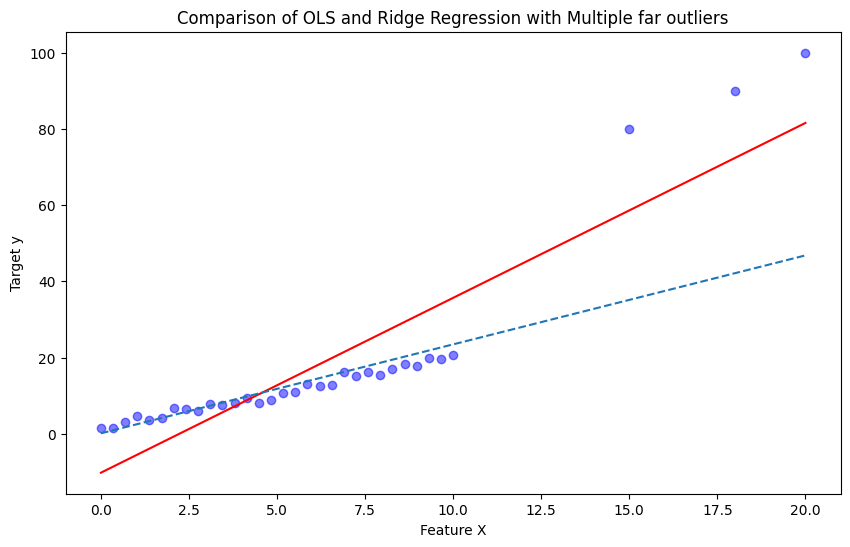

In [ ]:
# Compute the OLS and Ridge Regression solutions
beta_OLS = np.linalg.inv(X.T @ X) @ X.T @ y  # theta* formula ((W.T).W).(W.T).T

lambda_ridge = 1000 # A stronger lambda to empasize Ridge's dampening effect
I = np.eye(X.shape[1])
beta_Ridge = np.linalg.inv(X.T @ X + lambda_ridge * I) @ X.T @ y 

# Prepare to plot
plt.figure(figsize=(10,6))
plt.scatter(X_input, y, color="blue", alpha=0.5, label="Data Points")

# Plot the OLS fit
x_range = np.linspace(np.min(X_input), np.max(X_input), 100)
y_OLS = beta_OLS[0] + beta_OLS[1] * x_range
plt.plot(x_range, y_OLS, 'r-', label="OLS Fit")

# Plot the Ridge Regression fit
y_Ridge = beta_Ridge[0] + beta_Ridge[1] * x_range
plt.plot(x_range, y_Ridge, "g-", label="Ridge Regression Fit")

plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Comparison of OLS and Ridge Regression with Multiple far outliers")
plt.legend()
plt.show()